1. **Preprocressing [6 points]**

In this first stage, you will get familiar with the data and clean it up by dealing with some special cases.
Among that:
- Convert the PDF list in the **"killed-in-gaza_moh_2024-09-21.pdf"** file to CSV.
- Convert the JSON list in the **"infrastructure-damaged.json"** file to CSV.
- Discover missing information and deal with them logically.

In [29]:
# Run this first

import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')

In [30]:
# Convert the PDF list in the "killed-in-gaza_moh_2024-09-21.pdf" file to CSV

# Couldn't be done

In [31]:
# Convert the JSON list in the "infrastructure-damaged.json" file to CSV

import numpy as np
from datascience import Table
import json

json_file_path = 'infrastructure-damaged_2025-04-12.json'
with open(json_file_path, 'r') as file:
    data = json.load(file)

flattened_data = []
columns = []

for item in data:
    flattened_row = []
    for key, value in item.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened_row.append(subvalue)
                if key + '.' + subkey not in columns:
                    columns.append(key + '.' + subkey)
        else:
            flattened_row.append(value)
            if key not in columns:
                columns.append(key)
    flattened_data.append(flattened_row)

max_columns = max(len(row) for row in flattened_data)

for i in range(len(flattened_data)):
    while len(flattened_data[i]) < max_columns:
        flattened_data[i].append(None)

numpy_array = np.array(flattened_data)

tableJSON = Table().with_columns(*[(col, numpy_array[:, idx]) for idx, col in enumerate(columns)])

tableJSON.show(10)

csv_file_path = 'infrastructure-damaged_2025-04-12.csv'
tableJSON.to_csv(csv_file_path)


report_date,civic_buildings.ext_destroyed,educational_buildings.ext_destroyed,educational_buildings.ext_damaged,places_of_worship.ext_mosques_destroyed,places_of_worship.ext_mosques_damaged,places_of_worship.ext_churches_destroyed,residential.ext_destroyed,residential.destroyed,civic_buildings.destroyed,educational_buildings.destroyed,educational_buildings.damaged,places_of_worship.mosques_destroyed,places_of_worship.mosques_damaged,places_of_worship.churches_destroyed
2023-10-07,5,1,15,2,4,0,80,None,None,None,None,None,None,None
2023-10-08,11,1,30,4,8,0,159,159,None,None,None,None,None,None
2023-10-09,16,2,45,6,12,0,790,790,None,None,None,None,None,None
2023-10-10,22,2,60,8,17,0,1009,1009,None,None,None,None,None,None
2023-10-11,27,27,3,3,75,75,10,10,21,0,2835,2835,None,None
2023-10-12,29,3,3,75,75,10,10,25,0,4188,None,None,None,None
2023-10-13,31,9,100,12,29,0,5540,5540,None,None,None,None,None,None
2023-10-14,33,14,14,124,124,14,33,0,7000,7000,None,None,None,None
2023-10-15,35,14,14,143,143,16,37,0,8840,8840,None,None,None,None
2023-10-16,37,18,18,150,150,18,41,1,10500,10500,None,None,None,None


In [32]:
# Cleaning infrastructure-damaged_2025-04-12.csv

tableJSON_cleaned = tableJSON.select(np.arange(7))
tableJSON_cleaned.relabel("report_date", "Date")
tableJSON_cleaned.relabel("civic_buildings.ext_destroyed", "Civic Buildings Destroyed [CUMULATIVE]")
tableJSON_cleaned.relabel("educational_buildings.ext_destroyed", "Educational Buildings Destroyed")
tableJSON_cleaned.relabel("educational_buildings.ext_damaged", "Educational Buildings Damaged")
tableJSON_cleaned.relabel("places_of_worship.ext_mosques_destroyed", "Mosques Destroyed")
tableJSON_cleaned.relabel("places_of_worship.ext_mosques_damaged", "Mosques  Damaged")
tableJSON_cleaned.relabel("places_of_worship.ext_churches_destroyed", "Churches Damaged")

Date,Civic Buildings Destroyed [CUMULATIVE],Educational Buildings Destroyed,Educational Buildings Damaged,Mosques Destroyed,Mosques Damaged,Churches Damaged
2023-10-07,5,1,15,2,4,0
2023-10-08,11,1,30,4,8,0
2023-10-09,16,2,45,6,12,0
2023-10-10,22,2,60,8,17,0
2023-10-11,27,27,3,3,75,75
2023-10-12,29,3,3,75,75,10
2023-10-13,31,9,100,12,29,0
2023-10-14,33,14,14,124,124,14
2023-10-15,35,14,14,143,143,16
2023-10-16,37,18,18,150,150,18


In [33]:
# Importing and cleaning casualties_daily_west_bank_2025-04-12.csv

casualties_daily_west_bank = Table.read_table('casualties_daily_west_bank_2025-04-12.csv')

casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("report_date", "Date")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("verified.killed", "Verified Killed")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("verified.killed_cum", "Verified Killed [CUMULATIVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("verified.injured", "Verified Injured")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("verified.injured_cum", "Verified Injured [CUMULATIVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("verified.killed_children", "Verified Children Killed")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("verified.killed_children_cum", "Verified Children Killed [CUMULATIVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("verified.injured_children", "Verified Children Injured")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("verified.injured_children_cum", "Verified Children Injured [CUMULATIVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("killed_cum", "Killed [CUMULATVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("killed_children_cum", "Children Killed [CUMULATIVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("injured_cum", "Injured [CUMULATIVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("injured_children_cum", "Injured Children [CUMULATIVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("settler_attacks_cum", "Settler Attacks [CUMULATIVE]")
casualties_daily_west_bank_cleaned = casualties_daily_west_bank.relabel("flash_source", "Source")


# V = Verified
# NV = Not Verified 
casualties_daily_west_bank_cleaned_V = casualties_daily_west_bank_cleaned.select(0,1,2,3,4,5,6,7,8).take(np.arange(391))
casualties_daily_west_bank_cleaned_NV = casualties_daily_west_bank_cleaned.select(0,9,10,11,12,13,14)


casualties_daily_west_bank_cleaned_V

Date,Verified Killed,Verified Killed [CUMULATIVE],Verified Injured,Verified Injured [CUMULATIVE],Verified Children Killed,Verified Children Killed [CUMULATIVE],Verified Children Injured,Verified Children Injured [CUMULATIVE]
2023-10-07,6,6,197,197,2,2,31,31
2023-10-08,8,14,127,324,3,5,7,38
2023-10-09,4,18,88,412,0,5,19,57
2023-10-10,5,23,72,484,0,5,7,64
2023-10-11,6,29,85,569,2,7,17,81
2023-10-12,7,36,49,618,0,7,11,92
2023-10-13,17,53,613,1231,6,13,27,119
2023-10-14,3,56,13,1244,2,15,1,120
2023-10-15,2,58,18,1262,1,16,2,122
2023-10-16,2,60,23,1285,0,16,0,122


In [34]:
# Importing and cleaning casualties_daily_gaza_2025-04-12.csv

table = Table().read_table('casualties_daily_gaza_2025-04-12.csv')

selected = table.select(0, 1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 15, 16)

processed = Table()

for label in selected.labels:
    cleaned = label.lower().replace('ext', '')

    cleaned = cleaned.replace('cum', '[CUMULATIVE]')

    cleaned = cleaned.replace('_', ' ').strip()

    cleaned = cleaned.title()

    processed = processed.with_columns(cleaned, selected[label])

casualties_daily_gaza_cleaned = processed
casualties_daily_gaza_cleaned

Report Date,Report Source,Report Period,Massacres [Cumulative],Killed,Killed [Cumulative],Killed Children [Cumulative],Killed Women [Cumulative],Injured,Injured [Cumulative],Civdef Killed [Cumulative],Med Killed [Cumulative],Press Killed [Cumulative]
2023-10-07,mohtel,24,0,232,232,0,0,1610,1610,0,6,1
2023-10-08,mohtel,24,0,138,370,78,41,178,1788,0,6,1
2023-10-09,mohtel,24,8,190,560,91,61,483,2271,0,6,3
2023-10-10,mohtel,24,8,340,900,260,230,1729,4000,0,6,7
2023-10-11,gmotel,24,23,200,1100,398,230,1184,5184,0,10,nan
2023-10-12,mohtel,24,23,317,1417,500,276,579,5763,0,11,nan
2023-10-13,missing,24,23,483,1900,500,392,1475,7238,0,11,nan
2023-10-14,gmotel,24,23,328,2228,600,600,1476,8714,0,11,nan
2023-10-15,gmotel,24,23,442,2670,700,735,486,9200,0,11,nan
2023-10-16,gmotel,24,371,138,2808,853,936,1650,10850,7,37,nan


In [35]:
# Importing killed-in-gaza_2024-09-21.csv and cleaning

table2 = Table().read_table('killed-in-gaza_2024-09-21.csv')

killed_in_gaza_cleaned = table2.select(2, 3, 4, 5)

killed_in_gaza_cleaned.relabel("en_name","Name")
killed_in_gaza_cleaned.relabel("age","Age")
killed_in_gaza_cleaned.relabel("dob","DOB")
killed_in_gaza_cleaned.relabel("sex","Gender")

killed_in_gaza_cleaned.show(10)

Name,Age,DOB,Gender
Bint Asaia Nazar Muhammad Abu-warda,0,2024-07-18,f
Abn Wlaa Aldowasah,0,2024-06-16,m
Amal Muhammad Jmuaah Abu Sois,0,2023-12-05,f
Yasr Salah Yasr Aldlo,0,2023-10-19,m
Karml Alaaa Waleed Hamdan,0,2023-12-11,f
Maisaa Diab Mahmoud Alskafa,0,2023-11-02,f
Muhammad Naiam Nasr Aiad,0,2023-11-28,m
Knan Shadi Hashem Moshtaha,0,2023-12-04,m
Abn/ Anwar Ahmed Muhammad Daroish,0,2023-11-04,m
Daughter of zainab Muhammad al-Abd Nawwas,0,2023-11-15,f


**2. Exploratory Analysis & Visualization [12 points]**

In this stage, you will do some explorations over the data you have, trying to find interesting observations
and explore potential associations.


To warm up, try initially to plot some raw data, such as the number of casualties per day or per month,
etc. This can give you ideas about what you would like to explore further.

The goal in this stage is to show six interesting but different, plots out of the given datasets, from which
you can draw some “interesting” insights(patterns, trends, associations, etc.). Interesting insights indicate
insights that are non-trivial, useful to know, and well-motivated, that are typically drawn from plots that
required more processing and analysis.

All types of visualization plots that we studied are considered (line, bar chart, histogram, overlaid chart,
scatter, etc.). Plots generally become more interesting if data is analyzed in some way (for example,
aggregated, grouped, etc.) compared to plotting raw data.

From the plots you will show in this part (and even others plots), you will come up with questions that you
need to answer in the next part.

In [36]:
#  Plot 1 : Number of casualties per day [Line Graph]

Plot_1 = casualties_daily_gaza_cleaned.plot("Report Date","Killed")


In [37]:
# Plot 2 : Age distribution of the people killed [Histogram]

my_bins = make_array(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100)

plot_2 = killed_in_gaza_cleaned.hist(1, bins = my_bins)

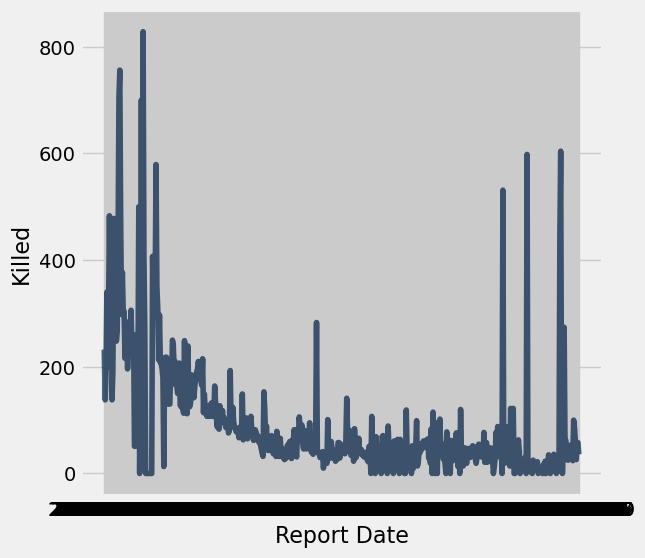

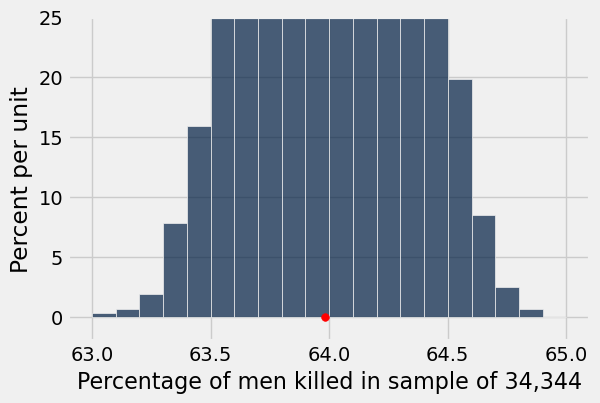

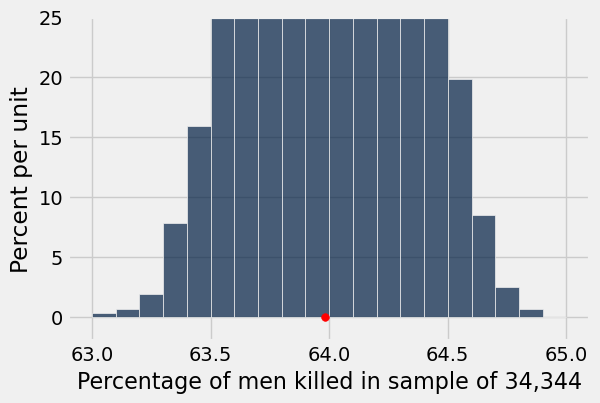

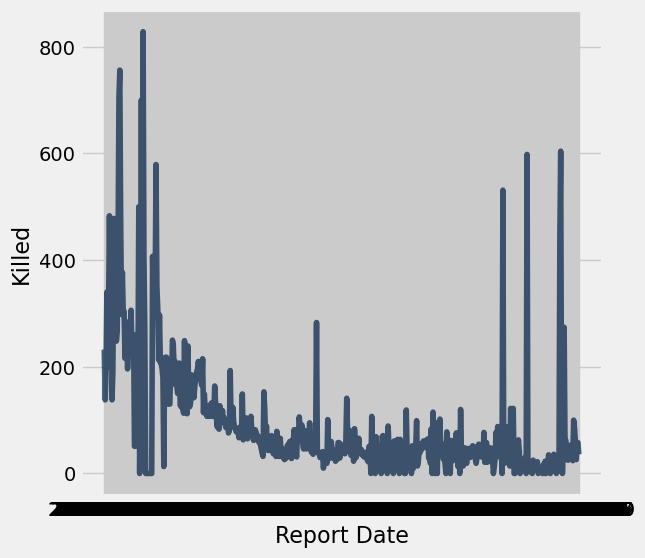

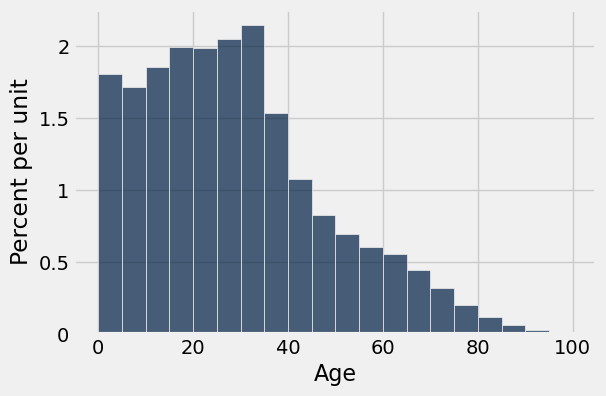

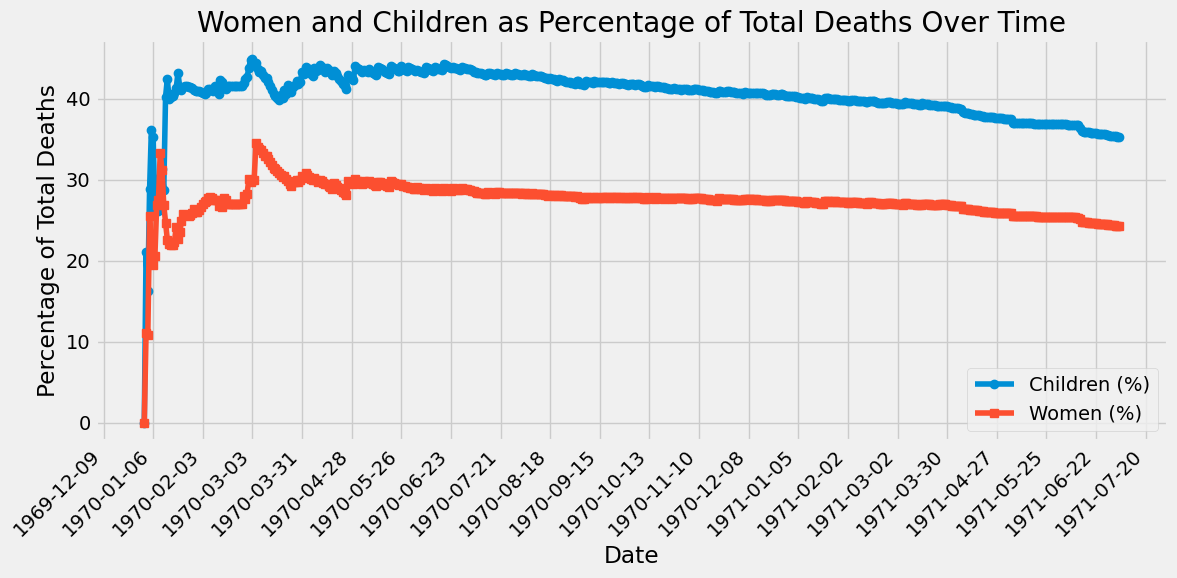

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


total_killed = np.array(casualties_daily_gaza_cleaned['Killed [Cumulative]'])
children_killed = np.array(casualties_daily_gaza_cleaned['Killed Children [Cumulative]'])
women_killed = np.array(casualties_daily_gaza_cleaned['Killed Women [Cumulative]'])

# Calculate percentages using numpy 
percent_children = np.divide(children_killed, total_killed, out=np.zeros_like(children_killed, dtype=float), where=total_killed != 0) * 100
percent_women = np.divide(women_killed, total_killed, out=np.zeros_like(women_killed, dtype=float), where=total_killed != 0) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(casualties_daily_gaza_cleaned['Report Date'], percent_children, label='Children (%)', marker='o')
plt.plot(casualties_daily_gaza_cleaned['Report Date'], percent_women, label='Women (%)', marker='s')

# Labeling
plt.xlabel('Date')
plt.ylabel('Percentage of Total Deaths')
plt.title('Women and Children as Percentage of Total Deaths Over Time')

# Format x-axis for better readability
plt.xticks(rotation=45, ha='right')  # Rotate the labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))  # Show every 4th week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set date format

# Add grid and legend
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [39]:
# Plot 4 : Children killed over time in West Bank [Line Graph]

casualties_daily_west_bank_cleaned_V.plot("Date", "Verified Children Killed")



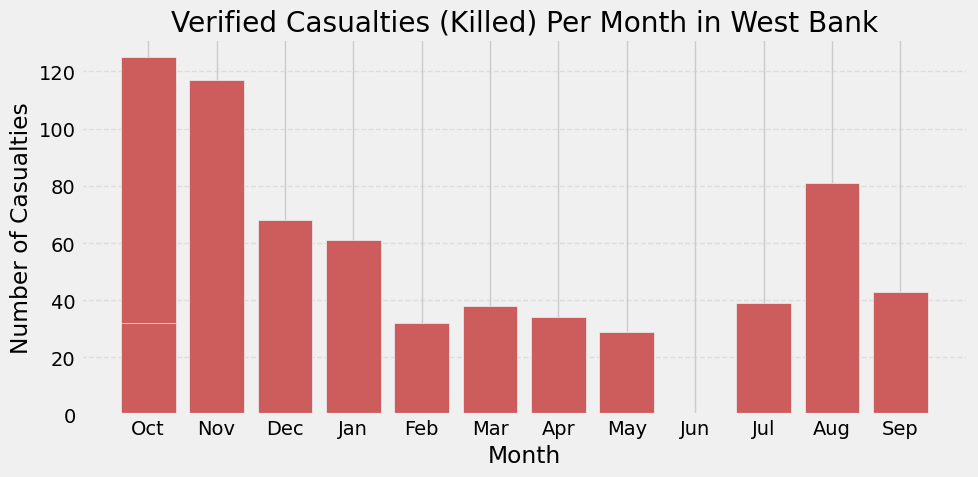

In [40]:
# Plot 5 : 
dates = casualties_daily_west_bank_cleaned_V.column('Date')
verified_killed = casualties_daily_west_bank_cleaned_V.column('Verified Killed')

months = []
monthly_killed = []
current_month = None
month_total = 0

for date, killed in zip(dates, verified_killed):
    month = date.split('-')[1]  # Extract month part
    if month != current_month:
        if current_month is not None:
            months.append(current_month)
            monthly_killed.append(month_total)
        current_month = month
        month_total = 0
    month_total += killed if killed is not None else 0

if current_month is not None:
    months.append(current_month)
    monthly_killed.append(month_total)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = [month_names[int(m)-1] for m in months]

plot.figure(figsize=(10, 5))
plot.bar(months, monthly_killed, color='indianred')
plot.title('Verified Casualties (Killed) Per Month in West Bank')
plot.xlabel('Month')
plot.ylabel('Number of Casualties')
plot.grid(axis='y', linestyle='--', alpha=0.5)
plot.tight_layout()
plot.show()


In [41]:
# Plot6: 
casualties_daily_gaza_cleaned.plot("Report Date", "Injured")


**3. Hypothesis Testing [12 points]**
In this stage, you will pose three different interesting questions (similar to the questions we studied in
class during the course) and you will then answer each using hypothesis testing. Interesting questions indicate questions that are non-trivial, useful to answer, and well-motivated. The questions can involve
one sample of observed data (as we studied in session 7) or two samples (as we studied in session 8).

For each question, design (and report) a complete hypothesis testing procedure. For each question:
- State and explain the two hypotheses (including where the chance is).
- Choose the test statistic (including why you chose it and the meaning of its small/large values).
- Design a simulation experiment to get the empirical distribution of the test statistic under the null
hypothesis.
- Perform the test and make a conclusion accordingly using the conventional significance levels.

When you think of a question, it is very important to think about where the chance (or randomness) is,
and thus where the random model is. 

**Hypothesis 1 : Are more men victims of this war or women ?**

Null Hypothesis (H0): Each male human in this war has a 65% chance of being killed.

Alternative viewpoint: No, they don't.



In [42]:
killed_in_gaza_cleaned.group("Gender")

Gender,count
f,12370
m,21974


In [43]:
observed_men_killed = 21974 / 34344
observed_men_killed

0.6398206382483113

In [44]:
predicted_proportions = make_array(0.64, 0.36)
sample_proportions(34344, predicted_proportions)

array([ 0.63769509,  0.36230491])

In [45]:
def males_killed():
    return sample_proportions(34344, predicted_proportions).item(0) * 100

In [46]:
males_killed()

64.23829489867225

In [47]:
dead_male = make_array()

for i in np.arange(10000):
    new_dead_male = males_killed()
    dead_male = np.append(dead_male, new_dead_male)

In [48]:
Table().with_column('Percentage of men killed in sample of 34,344', dead_male).hist(bins = (63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.1, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0))


plot.ylim(-0.02, 0.25)
plot.scatter(observed_men_killed * 100, 0, color='red', s=30);

Hypothesis 2 : Are women and children being disproportionately targeted in Gaza, as evidenced by a higher proportion of their deaths compared to their share in the population?


Observed proportion of women + children killed: 0.5963


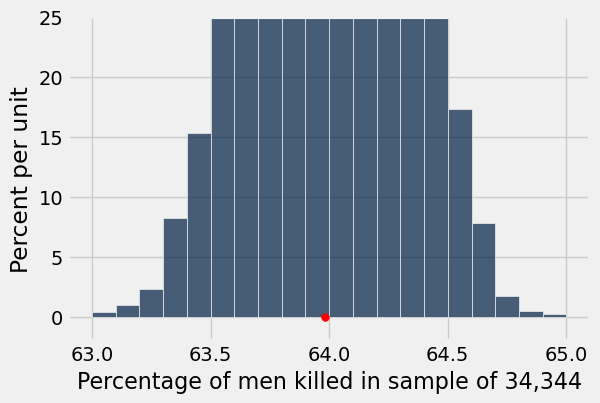

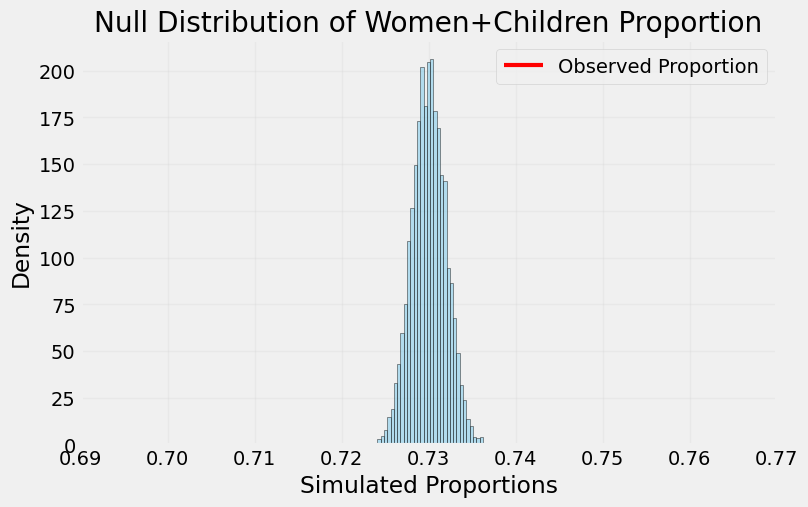

Population Proportion under Null: 0.73
Observed Proportion: 0.5963
Empirical p-value: 1.0


In [49]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt

# Extract totals from the latest row
total_killed = casualties_daily_gaza_cleaned.column("Killed [Cumulative]")[-1]
children_killed = casualties_daily_gaza_cleaned.column("Killed Children [Cumulative]")[-1]
women_killed = casualties_daily_gaza_cleaned.column("Killed Women [Cumulative]")[-1]
women_children_killed = children_killed + women_killed

# Observed test statistic
observed_proportion = women_children_killed / total_killed
print("Observed proportion of women + children killed:", round(observed_proportion, 4))

# Null hypothesis: deaths follow population distribution (73% women+children)
population_proportion = 0.73
num_simulations = 10000
sample_size = total_killed

# Simulate under the null
simulated_stats = []
for _ in range(num_simulations):
    simulated_sample = np.random.choice(["W+C", "Other"], size=sample_size, 
                                        p=[population_proportion, 1 - population_proportion])
    prop_wc = np.count_nonzero(simulated_sample == "W+C") / sample_size
    simulated_stats.append(prop_wc)

simulated_stats = np.array(simulated_stats)

# Plot the histogram with better formatting
plt.figure(figsize=(8,5))
plt.hist(simulated_stats, bins=40, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.axvline(observed_proportion, color='red', linewidth=3, label='Observed Proportion')
plt.title('Null Distribution of Women+Children Proportion')
plt.xlabel('Simulated Proportions')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.69, 0.77)  # Zoom in around the null hypothesis value
plt.grid(alpha=0.2)
plt.show()

?
distance_from_null = np.abs(observed_proportion - population_proportion)
extreme = (simulated_stats >= observed_proportion)  
p_value = np.mean(extreme)


print("Population Proportion under Null:", population_proportion)
print("Observed Proportion:", round(observed_proportion, 4))
print("Empirical p-value:", p_value)



Question 3: Is the proportion of children killed greater than 20%?
(Null Hypothesis) H0: The proportion of children among verified killed is 20% (p = 0.2).
(Alternative Hypothesis) H1: p > 0.2

Observed proportion: 0.2258
p-value: 1.0000


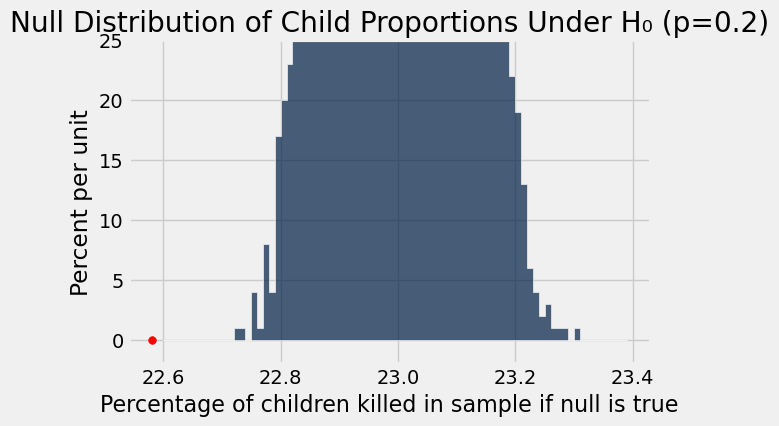

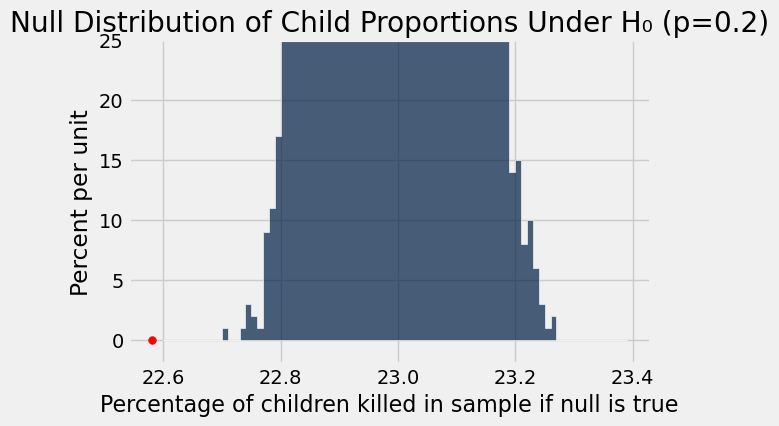

In [53]:
total_killed = np.sum(casualties_daily_west_bank_cleaned_NV.column("Killed [CUMULATVE]"))
children_killed = np.sum(casualties_daily_west_bank_cleaned_NV.column("Children Killed [CUMULATIVE]"))

observed_proportion = children_killed / total_killed

def sample_child_proportion():
    return sample_proportions(total_killed, make_array(0.23, 0.77)).item(0) * 100


child_proportions = make_array()
for i in np.arange(10000):
    new_prop = sample_child_proportion()
    child_proportions = np.append(child_proportions, new_prop)

p_value = np.mean(child_proportions >= observed_proportion * 100)
print(f"Observed proportion: {observed_proportion:.4f}")
print(f"p-value: {p_value:.4f}")

Table().with_column('Percentage of children killed in sample if null is true', child_proportions).hist(bins=np.arange(22.6, 23.4, 0.01))
plot.ylim(-0.02, 0.25)
plot.scatter(observed_proportion * 100, 0, color='red', s=30);
plot.title('Null Distribution of Child Proportions Under H₀ (p=0.2)');
plot.show()